<a href="https://colab.research.google.com/github/eonadler/Colab-Notebooks/blob/main/Week_5_Group_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dark Matter & Data Visualization Week 5: Group Exercises

This week's notebook contains group exercises related to the scientific content and coding skills covered in the first half of the course. Since there might not be time to finish all exercises during class, please start with the one you're most interested in.

## Table of Contents:
* [Exercise: How the Composition of the Universe Evolves](#first-bullet)
* [Exercise: Experimenting with the Three-body System](#second-bullet)

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.use('dark_background')

## Exercise: How the Composition of the Universe Evolves <a name="first-bullet"></a>

We learned that the universe is currently composed of roughly $70\%$ dark energy, $25\%$ dark matter, and $5\%$ "normal" (Standard Model) matter. Part of the normal matter is in the form of *radiation* (e.g., photons), which accounts for roughly $ 0.01\%$ of the universe's energy content today.

The composition of the universe changes dramatically over time. Mathematically, we define the size of the universe relative to its size today by the *scale factor*, $a$. The scale factor is a function of the time elapsed since the Big Bang, $t$. The size of the universe $a(t)$ was smaller in the past and is defined such that $a(t_{\mathrm{today}}=13.7\ \mathrm{Gyr}) = 1$.

In appropriate units, the amount of energy per volume (or "energy density") in the universe in the form of dark energy ($\rho_{\Lambda}$), dark matter plus normal matter ($\rho_m$) , and radiation ($\rho_{\gamma}$) can be written as functions of the scale factor:

$\rho_{\Lambda} = \Omega_{\Lambda,0}$

$\rho_m = \Omega_{m,0} a^{-3}$

$\rho_{\gamma} = \Omega_{\gamma,0} a^{-4}$,

where $\Omega_{\Lambda,0} = 0.7$, $\Omega_{m,0} = 0.3$, and $\Omega_{\gamma,0} = 10^{-4}$ are the respective fractions of the energy content today. The amount of dark energy per unit volume is a property of spacetime, so it doesn't depend on the scale factor, while the matter energy density is inversely proportional to the volume of the universe because the density of matter increases for particles that occupy a smaller volume. The radiation energy density has an extra factor of inverse scale factor because photons and other forms of radiation lose energy as the universe expands (this is the "cosmological redshift" we discussed in Week 1).

**Exercise.**

a) Plot the evolution of $\rho_{\Lambda}$, $\rho_m$, and $\rho_{\gamma}$ for $10^{-5}<a<1$. Describe the regions of your plot as "dark energy-dominated," "matter-dominated," or "radiation dominated" depending on which energy density is the largest. (Or, even better, indicate these regions on the plot using `plt.text`, `plt.axvspan`, etc.!)

b) Use Python to find the scale factor and redshift at which $\rho_{\Lambda} = \rho_m$ ("dark energy--matter equality") and $\rho_m = \rho_{\gamma}$ ("matter--radiation equality").

c) Extend your plot into the future, i.e., $a>1$. What happens mathematically? What do you think this means physically?

In [ ]:
#Your code here!

In [ ]:
#Your code here!

In [ ]:
#Your code here!

## Exercise: Experimenting with the Three-body System <a name="second-bullet"></a>

The code that sets up last week's three-body system exercise is copied below.

In [ ]:
def initialize_particles(p1_0,v1_0,p2_0,v2_0,p3_0,v3_0,Nsteps=2500):
  #Define position and velocity arrays
  p1, v1 = np.zeros((Nsteps,2)), np.zeros((Nsteps,2))
  p2, v2 = np.zeros((Nsteps,2)), np.zeros((Nsteps,2))
  p3, v3 = np.zeros((Nsteps,2)), np.zeros((Nsteps,2))

  #Set initial values
  p1[0], p2[0], p3[0] = p1_0, p2_0, p3_0
  v1[0], v2[0], v3[0] = v1_0, v2_0, v3_0

  return p1, v1, p2, v2, p3, v3

def get_acceleration(p1,p2,m):
  #Calculate gravitational acceleration
	displacement = p1-p2
	acceleration = -1.*m*displacement/((np.sqrt(np.sum(displacement**2,axis=0)))**(3./2.))
	return acceleration

def evolve(p1,v1,m1,p2,v2,m2,p3,v3,m3,dt=0.01,Nsteps=2500):
  #Loop over timesteps
  for i in range(Nsteps-1):
    dv1 = get_acceleration(p1[i],p2[i],m2) + get_acceleration(p1[i],p3[i],m3)
    dv2 = get_acceleration(p2[i],p1[i],m1) + get_acceleration(p2[i],p3[i],m3)
    dv3 = get_acceleration(p3[i],p1[i],m1) + get_acceleration(p3[i],p2[i],m2)

    #Update velocities, then positions
    v1[i + 1] = v1[i] + dv1*dt
    v2[i + 1] = v2[i] + dv2*dt
    v3[i + 1] = v3[i] + dv3*dt

    p1[i + 1] = p1[i] + v1[i]*dt
    p2[i + 1] = p2[i] + v2[i]*dt
    p3[i + 1] = p3[i] + v3[i]*dt

  return p1, p2, p3

In [ ]:
#Set particle masses
m1 = 1
m2 = 2
m3 = 3

#Set initial positions and velocities
p1_0 = np.array([1., 0.])
v1_0 = np.array([-0.1, 0.])

p2_0 = np.array([0., 1.])
v2_0 = np.array([0., -0.1])

p3_0 = np.array([1., 1.])
v3_0 = np.array([0., 0.])

p1, v1, p2, v2, p3, v3 = initialize_particles(p1_0,v1_0,p2_0,v2_0,p3_0,v3_0)
p1, p2, p3 = evolve(p1,v1,m1,p2,v2,m2,p3,v3,m3)

<ipython-input-4-79e98bb6e7c7>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "^" (-> marker='^'). The keyword argument will take precedence.
  plt.plot(p1[0][0], p1[0][1], '^', color='orange', marker='o', markersize = 10, alpha=0.5)
<ipython-input-4-79e98bb6e7c7>:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "^" (-> marker='^'). The keyword argument will take precedence.
  plt.plot(p1[-1][0], p1[-1][1], '^', color='orange', marker='o', markersize = 10, alpha=1)
<ipython-input-4-79e98bb6e7c7>:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "^" (-> marker='^'). The keyword argument will take precedence.
  plt.plot(p2[0][0], p2[0][1], '^', color='white', marker='o', markersize = 10, alpha=0.5)
<ipython-input-4-79e98bb6e7c7>:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "^" (-> marker=

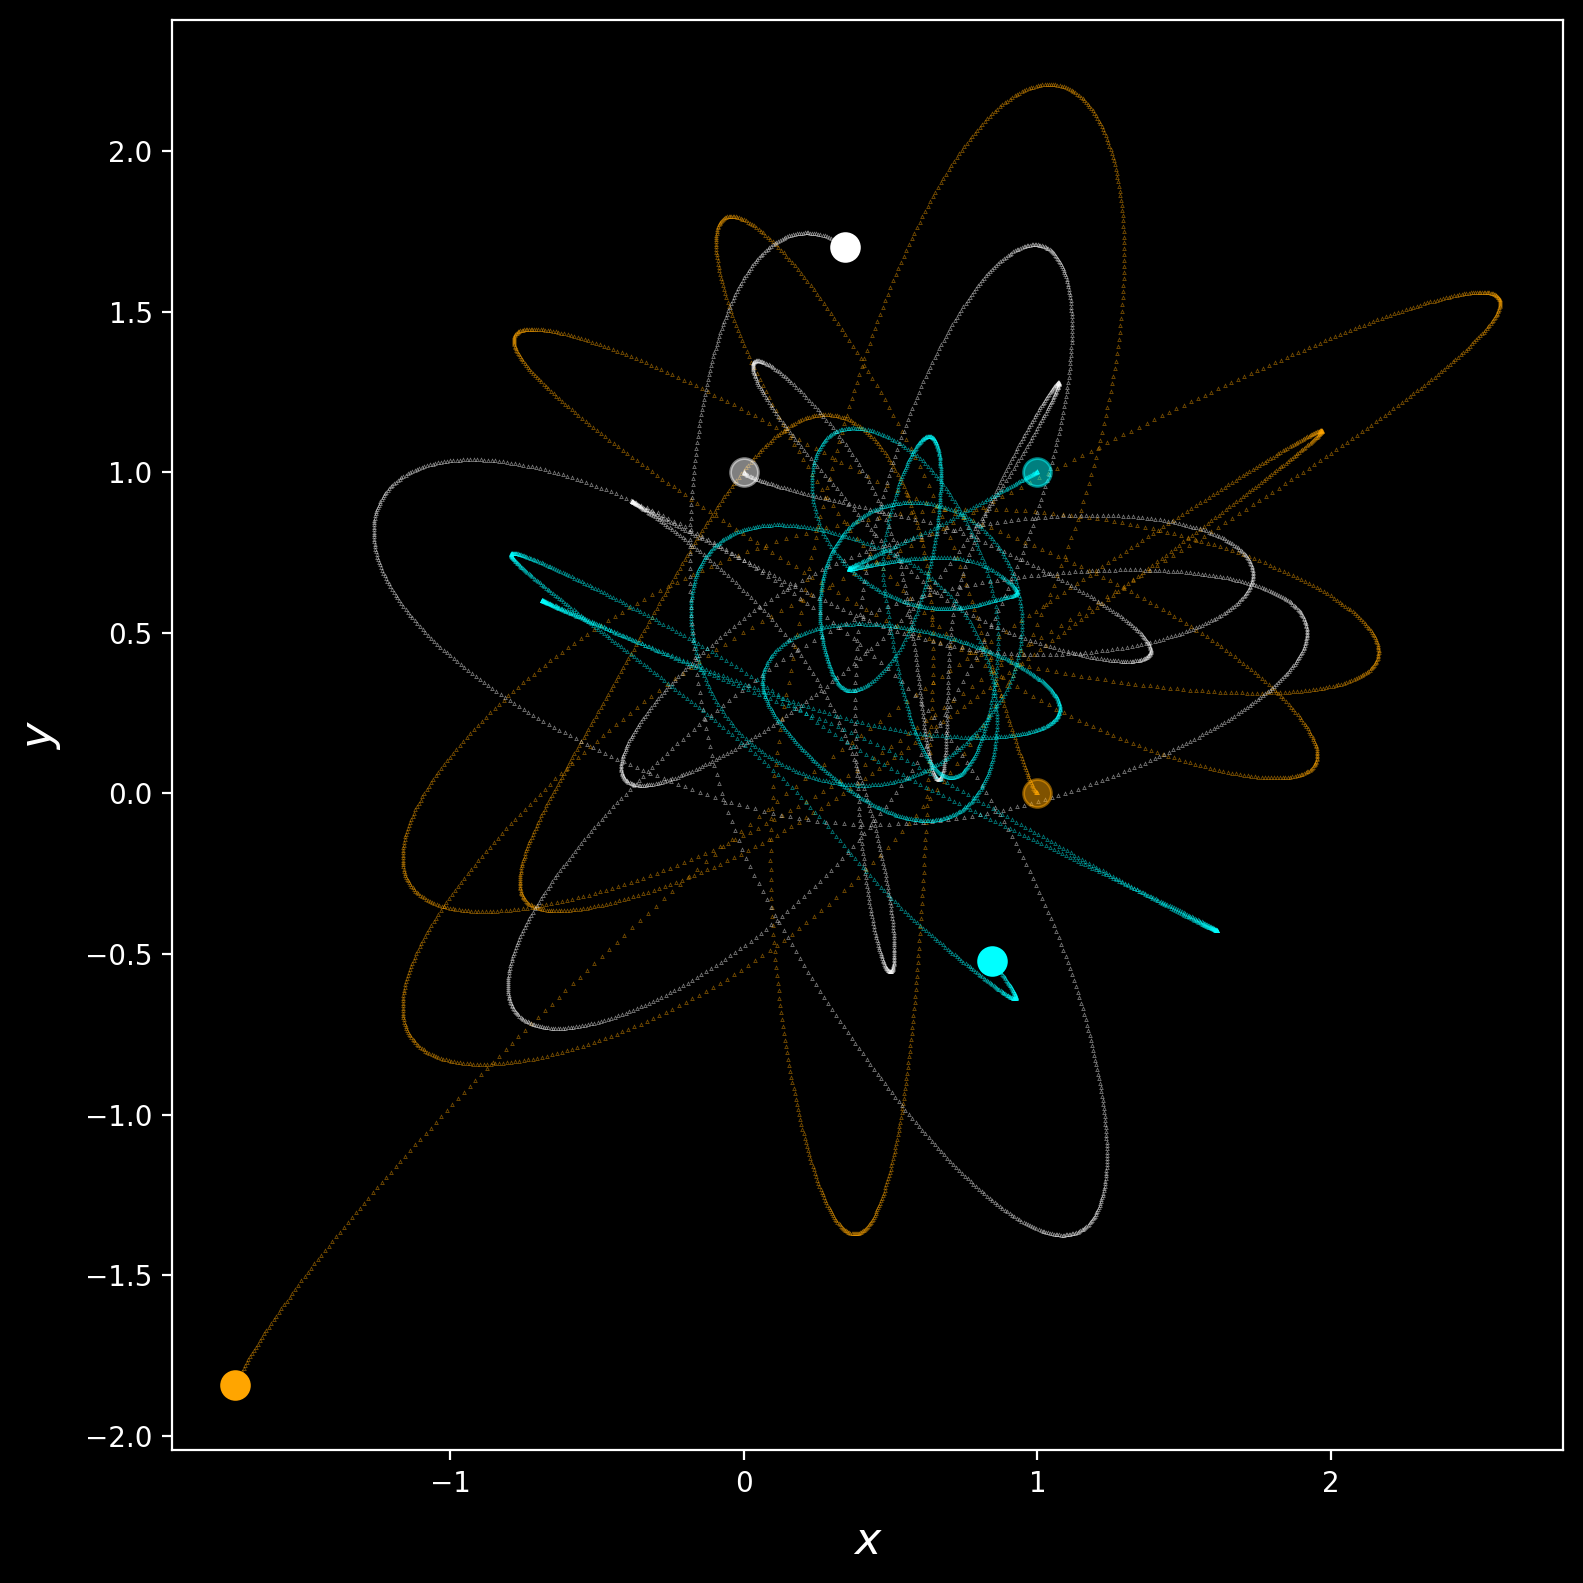

In [ ]:
#Visualize evolution
fig = plt.figure(figsize=(8, 8))

plt.plot([i[0] for i in p1], [j[1] for j in p1], '^', color='orange', markersize = 0.01, alpha=0.5)
plt.plot([i[0] for i in p2], [j[1] for j in p2], '^', color='white', markersize = 0.01, alpha=0.5)
plt.plot([i[0] for i in p3], [j[1] for j in p3], '^', color='cyan', markersize = 0.01, alpha=0.5)

plt.plot(p1[0][0], p1[0][1], '^', color='orange', marker='o', markersize = 10, alpha=0.5)
plt.plot(p1[-1][0], p1[-1][1], '^', color='orange', marker='o', markersize = 10, alpha=1)

plt.plot(p2[0][0], p2[0][1], '^', color='white', marker='o', markersize = 10, alpha=0.5)
plt.plot(p2[-1][0], p2[-1][1], '^', color='white', marker='o', markersize = 10, alpha=1)

plt.plot(p3[0][0], p3[0][1], '^', color='cyan', marker='o', markersize = 10, alpha=0.5)
plt.plot(p3[-1][0], p3[-1][1], '^', color='cyan', marker='o', markersize = 10, alpha=1)

plt.xlabel(r'$x$',fontsize=16,labelpad=8)
plt.ylabel(r'$y$',fontsize=16,labelpad=8)

#Show the plot (you might need to run this twice if there's a white border around the plot)
plt.tight_layout()
plt.show()

**Exercise.**

a) Visualize the evolution of the three-body system for a configuration where one particle is very light compared to the other two. In words, describe what happens physically in this case.

b) Visualize the evolution of the three-body system for a configuration where two particles are very light compared to the other one. In words, describe what happens physically in this case.

c) Generalize the three-body system code to include one (or more!) additional particles, and visualize their evolution.

In [ ]:
#Your code here!

In [ ]:
#Your code here!

In [ ]:
#Your code here!